In [1]:
# Import statements for required libraries
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

In [2]:
# Open the file
with open('sys_npt.lammpstrj', 'r') as f:
    data = f.readlines()
n_atoms = int(data[3].strip()) # Total number of atoms in the system
print(n_atoms)

512


In [3]:
# Helper function to return a list of coordinates for the
# frame of interest. `start` and `end` variables are the line
# numbers to read.

def get_cordinates_for_frame(data, start, end):
    coordinates = []
    for l in data[start: end+1]:
        s = l.split()
        try:
            if int(s[1]) == 1:
                coordinates.append([float(s[2])*40, float(s[3])*40, float(s[4])*40])
        except:
            continue
    return coordinates

In [4]:
# Helper function to calculate the distance between atoms
# keeping in mind the boundary conditions

def distance_between_points(p, q):
    distance_x = abs(p[0] - q[0])
    distance_x = min(distance_x, abs(box_size - distance_x))
    distance_y = abs(p[1] - q[1])
    distance_y = min(distance_y, abs(box_size - distance_y))
    distance_z = abs(p[2] - q[2])
    distance_z = min(distance_z, abs(box_size - distance_z))
    
    return np.lib.scimath.sqrt(distance_x**2 + distance_y**2 + distance_z**2)

In [5]:
# Initialise the calculation

n_bins = 100
n_frames = 4000
box_size = 40
increment = box_size / (2 * n_bins)
r_cut = box_size / 2

In [9]:
# Loop over all the frames and for each frame and find the distribution of distances

def get_distribution():
    distribution = np.zeros(n_bins)

    # skip first 
    for k in range(3990,n_frames):
        print(k)
        start = k*n_atoms + (k+1)*9
        end = start + n_atoms
        coordinates = []
        coordinates = get_cordinates_for_frame(data, start, end)
        n_particles = len(coordinates)
        for i in range(n_particles-1):
            for j in range(i+1, n_particles):
                distance = distance_between_points(coordinates[i], coordinates[j])
                if distance < (r_cut):
                    ig = int(distance / increment)
                    distribution[ig] = distribution[ig] + 2
    return distribution

In [ ]:
# Calculate g(r) by normalising the distribution
distribution = get_distribution()

for j in range(n_bins):
    distribution[j] = distribution[j]/10
    
r2_l = []

for j in range(n_bins):
    r1 = j * increment
    r2 = r1 + increment
    r2_l.append(r2)
    vol_bin = (4/3) * sp.pi * (r2**3 - r1**3)
    density = n_atoms / (box_size**3)
    n_ideal = vol_bin * density
    distribution[j] = distribution[j] / n_ideal
    distribution[j] = distribution[j] / n_atoms

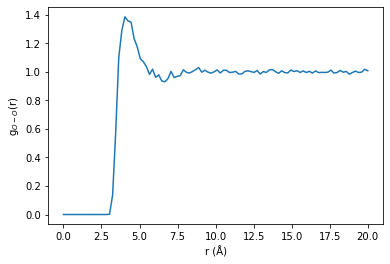

CALCULATED USING TRAJECTORY


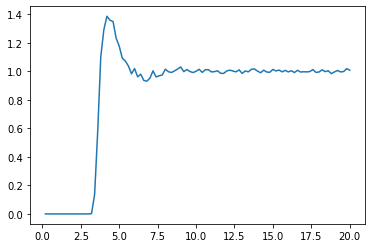

In [8]:
## CALCULATION USING PYTHON AND THE TRAJECTORY

radii = np.linspace(0.0, n_bins*increment, n_bins)
plt.xlabel('r (Å)')
plt.ylabel('g$_{O-O}$(r)')
plt.plot(radii, distribution)
plt.show()
print("CALCULATED USING TRAJECTORY")
plt.plot(r2_l, distribution)
plt.show()

In [14]:
# Open the lammps rdf file
with open('system.rdf', 'r') as f:
    data = f.readlines()

In [15]:
# Read all the lines and get the x and y values
x = []
y = []
for l in data[200:]:
    s = l.split()
    x.append(float(s[1]))
    y.append(float(s[2]))

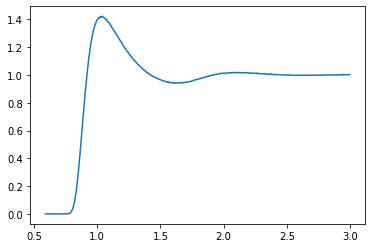

CALCULATED USING LAMMPS RDF OUTPUT


In [17]:
## CALCULATION USING LAMMPS RDF FILE


import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()
print("CALCULATED USING LAMMPS RDF OUTPUT")